# <center>Banking Dataset - Marketing Targets</center>

## Problem Statement

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

### <b>Detailed Column Descriptions</b>
1 - age <br>
2 - job : type of job<br>
3 - marital : marital status<br>
4 - education <br>
5 - default: has credit in default? (binary: "yes","no")<br>
6 - balance: average yearly balance, in euros (numeric)<br>
7 - housing: has housing loan? (binary: "yes","no")<br>
8 - loan: has personal loan? (binary: "yes","no")<br>

### related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular")<br>
10 - day: last contact day of the month (numeric)<br>
11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")<br>
12 - duration: last contact duration, in seconds (numeric)<br>

### other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)<br>
15 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")<br>

### Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [1]:
#Importing required libraries
import statistics
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("bank-additional-full.csv",sep=";")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# checking for Null Values
df.isnull().sum().sum()

0

In [7]:
# checking for dupliacted rows
df.duplicated().sum()

12

In [8]:
#dropping duplicated rows
df = df.drop_duplicates()
df.shape

(41176, 21)

In [9]:
df.describe(include='all').style.background_gradient(cmap='Blues')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.000000,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176.000000,41176.000000,41176.000000,41176.000000,41176,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176
unique,nan,12,4,8,3,3,3,2,10,5,nan,nan,nan,nan,3,nan,nan,nan,nan,nan,2
top,nan,admin.,married,university.degree,no,yes,no,cellular,may,thu,nan,nan,nan,nan,nonexistent,nan,nan,nan,nan,nan,no
freq,nan,10419,24921,12164,32577,21571,33938,26135,13767,8618,nan,nan,nan,nan,35551,nan,nan,nan,nan,nan,36537
mean,40.023800,nan,nan,nan,nan,nan,nan,nan,nan,nan,258.315815,2.567879,962.464810,0.173013,nan,0.081922,93.575720,-40.502863,3.621293,5167.034870,nan
std,10.420680,nan,nan,nan,nan,nan,nan,nan,nan,nan,259.305321,2.770318,186.937102,0.494964,nan,1.570883,0.578839,4.627860,1.734437,72.251364,nan
min,17.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,1.000000,0.000000,0.000000,nan,-3.400000,92.201000,-50.800000,0.634000,4963.600000,nan
25%,32.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,102.000000,1.000000,999.000000,0.000000,nan,-1.800000,93.075000,-42.700000,1.344000,5099.100000,nan
50%,38.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,180.000000,2.000000,999.000000,0.000000,nan,1.100000,93.749000,-41.800000,4.857000,5191.000000,nan
75%,47.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,319.000000,3.000000,999.000000,0.000000,nan,1.400000,93.994000,-36.400000,4.961000,5228.100000,nan


#### <center>since there is no much difference between mean and median values for each continous feature there seems to be no outliers in the data except for "duration"  feature which has some deviation. so checking for outlier in that feature.</center>

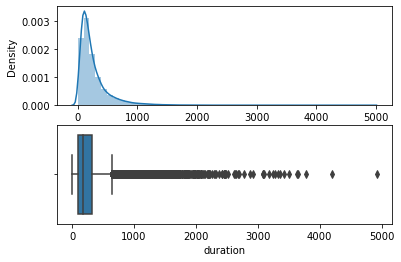

In [10]:
# checking for outliers for duration to be sure as there is some difference b/w mean and median
fig,ax1 = plt.subplots(2,1)
sns.distplot(df['duration'],ax=ax1[0])
sns.boxplot(df['duration'],ax=ax1[1])
plt.show()

In [11]:
df[df['duration']>800]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37,52,technician,married,basic.9y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
61,51,blue-collar,married,basic.9y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41121,46,admin.,single,university.degree,no,yes,no,cellular,nov,tue,...,3,999,1,failure,-1.1,94.767,-50.8,1.046,4963.6,no
41122,34,technician,married,unknown,no,no,no,cellular,nov,tue,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,yes
41123,36,blue-collar,single,basic.6y,no,no,no,cellular,nov,tue,...,4,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,yes
41160,33,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.035,4963.6,yes


#### <center>as expected we have outliers in the duration feature since there are too many rows as outliers i am treating only for values greater than 3500</center>

In [12]:
# outlier Treament for duration feature -- imputing median value where value value is greater than equal to 3500.
df['duration']=np.where(df['duration']>=3500,df['duration'].median(),df['duration'])

In [13]:
df['y'].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

#### Since the frequency of yes and no are very different this is an <b>Imbalanced Dataset.

# <center>Exploratory Data Analysis</center>

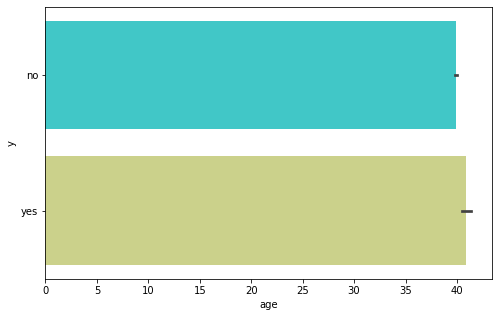

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(x='age',y='y',data=df, palette='rainbow')
plt.show()

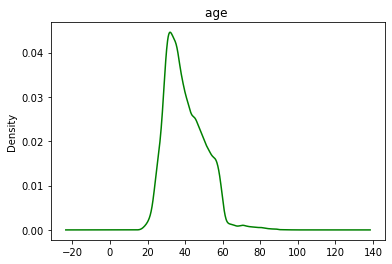

In [15]:
df.age.plot.density(color='green')
plt.title('age ')
plt.show()

#### Here since the age targeted here is almost of age greater than 20 and below 60, the plots here must make sense and age 

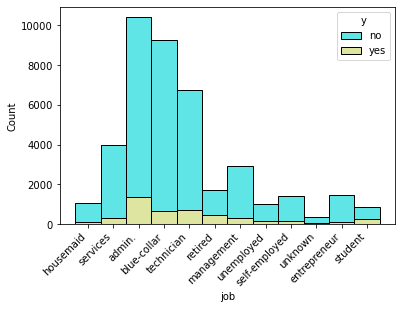

In [16]:
sns.histplot(data=df, x="job", hue="y", multiple="stack", palette='rainbow')
plt.xticks(rotation = 45, ha="right")
plt.show()

#### Conclusion: The plot says that, customers who are belog to admin profile is most likely to subscribe to a term deposit

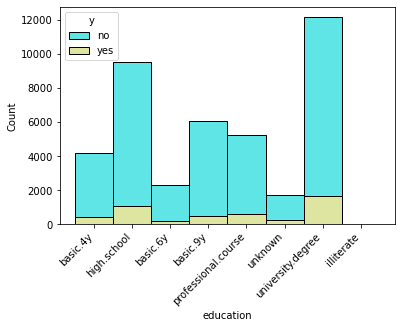

In [17]:
sns.histplot(data=df, x="education", hue="y", multiple="stack",palette='rainbow')
plt.xticks(rotation = 45, ha="right")
plt.show()

#### Conclusion: The plot says that, customers who are Degree holders and completed High Schooling is most likely to subscribe to a term deposit.

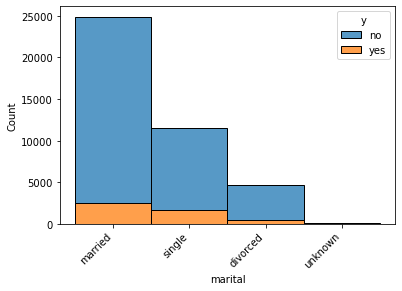

In [18]:
sns.histplot(data=df, x="marital", hue="y", multiple="stack")
plt.xticks(rotation = 45, ha="right")
plt.show()

#### Conclusion: The plot says that, customers who are maried are most likely to subscribe to a term deposit.

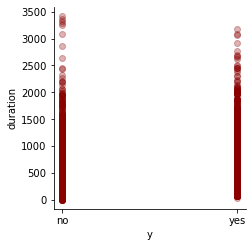

In [19]:
sns.PairGrid(df,x_vars='y',y_vars='duration',height = 3.5).map(plt.scatter, color='darkred', alpha = 0.3)
plt.show()

#### Conclusion: The plot says that, duration is not influencing the customer to subscribe to a term deposit much.

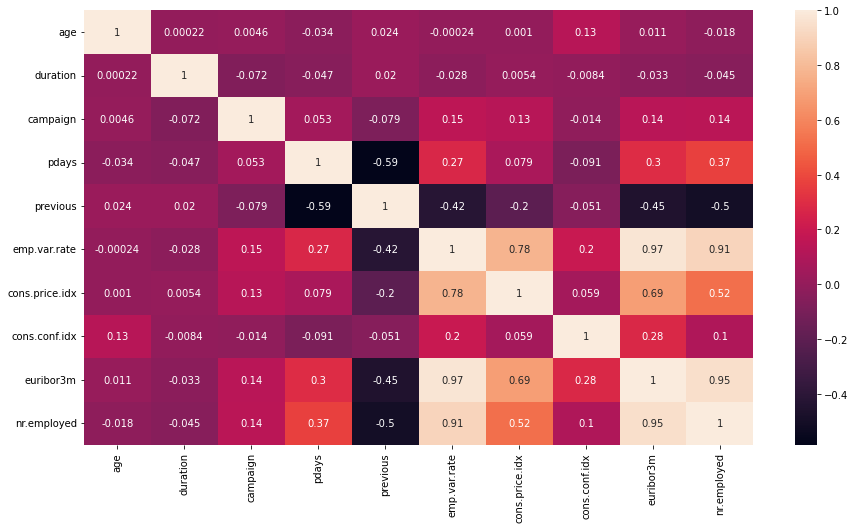

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot = True)
plt.show()

# <center>Feature Engineering</center>

In [21]:
# Labele Encoding the target variable 
labelencoder=LabelEncoder()
df['y']=labelencoder.fit_transform(df['y'])

In [22]:
# Converting the categprical features to numerical features
for i in df.columns:
    if df[i].dtype == "object":
        df[i]=df[i].astype('category').cat.codes

In [23]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [24]:
df.dtypes

age                 int64
job                  int8
marital              int8
education            int8
default              int8
housing              int8
loan                 int8
contact              int8
month                int8
day_of_week          int8
duration          float64
campaign            int64
pdays               int64
previous            int64
poutcome             int8
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int32
dtype: object

# train_test_split

In [25]:
x = df.drop('y',axis=1)
y = df['y']

In [26]:
print(x.shape)
print(y.shape)

(41176, 20)
(41176,)


#### Splitting the whole dataset into train and test to measure for effectiveness of a model

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

#### Splitting the train dataset into train and Cross validation to deal with overfitting and underfitting also to perform hyperparameter Tunning

In [28]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train,y_train,test_size=0.2, random_state=42)

# <center>Model Building -- Training the model</center>

## 1) Desicion Tree Classifier

In [29]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_cv)

In [30]:
DT.score(x_cv,y_cv)

0.8881299332119005

In [31]:
# dealing with overfitting and underfitting also perform hyperparameter Tunning in one shot
accuracy_list = []
for i in range(1,20):
    DT = DecisionTreeClassifier(max_depth=i)
    DT.fit(x_train, y_train)
    y_pred = DT.predict(x_cv)
    accuracy_list.append(DT.score(x_cv,y_cv))

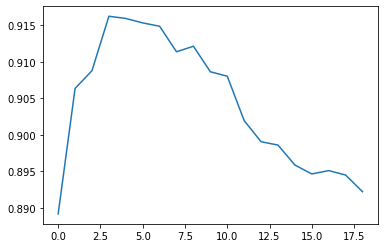

In [32]:
plt.plot(accuracy_list)
plt.show()

In [33]:
np.argmax(accuracy_list), accuracy_list[np.argmax(accuracy_list)]

(3, 0.9162112932604736)

In [34]:
# Training the model with best estimators 
DT = DecisionTreeClassifier(max_depth=4)
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)
DT.score(x_test,y_test)

0.9102719766877125

## 2) RandomForestClassifier

In [35]:
# dealing with overfitting and underfitting also perform hyperparameter Tunning in one shot
accuracy_list = []
for i in range(10,400,10):
    RF = RandomForestClassifier(n_estimators=i)
    RF.fit(x_train, y_train)
    y_pred = RF.predict(x_cv)
    accuracy_list.append(RF.score(x_cv,y_cv))

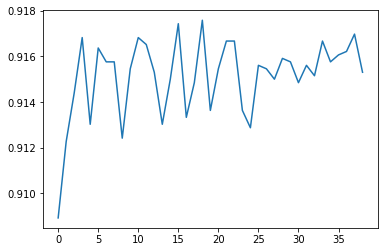

In [36]:
plt.plot(accuracy_list)
plt.show()

In [37]:
np.argmax(accuracy_list), accuracy_list[np.argmax(accuracy_list)]

(18, 0.9175774134790529)

In [38]:
np.argmax(accuracy_list), accuracy_list[np.argmax(accuracy_list)]

(18, 0.9175774134790529)

In [39]:
# Training the model with best estimators 
RF = RandomForestClassifier(n_estimators=180)
RF.fit(x_train, y_train)

RandomForestClassifier(n_estimators=180)

In [40]:
RF.score(x_test,y_test)

0.911121903836814

In [41]:
y_pred = RF.predict(x_test)

## 3) Logistic Regression

In [42]:
# Scaling the features to train for Logistic Regressor, KNN, SVM
scaler = StandardScaler()
scaler.fit(x_train)
print(scaler.mean_)

[ 3.99926761e+01  3.71937614e+00  1.17334548e+00  3.74415604e+00
  2.05335458e-01  1.07684426e+00  3.30335458e-01  3.66917122e-01
  4.24278992e+00  2.01517911e+00  2.55908432e+02  2.57619915e+00
  9.62790414e+02  1.73269581e-01  9.29189435e-01  8.24719186e-02
  9.35772912e+01 -4.05446494e+01  3.62012489e+00  5.16700242e+03]


In [43]:
x_train = scaler.transform(x_train)

In [44]:
x_test = scaler.transform(x_test)

In [45]:
x_cv = scaler.transform(x_cv)

In [46]:
Log_R = LogisticRegression(max_iter=10000,C=10)
Log_R.fit(x_train,y_train)

LogisticRegression(C=10, max_iter=10000)

In [47]:
Log_R.score(x_test,y_test)

0.9049295774647887

In [48]:
# dealing with overfitting and underfitting also perform hyperparameter Tunning in one shot
accuracy_list = []
for i in range(1,20):
    LR = LogisticRegression(max_iter=10000,C=i)
    LR.fit(x_train, y_train)
    accuracy_list.append(LR.score(x_cv,y_cv))

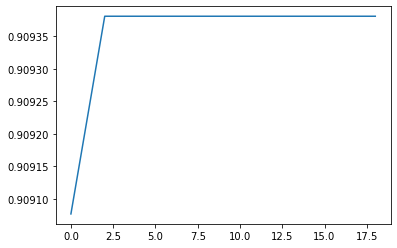

2


In [49]:
plt.plot(accuracy_list)
plt.show()
print(np.argmax(accuracy_list))

In [50]:
np.argmax(accuracy_list), accuracy_list[np.argmax(accuracy_list)]

(2, 0.9093806921675774)

In [51]:
# Training the model with best estimators 
Log_R = LogisticRegression(max_iter=10000,C=3)
Log_R.fit(x_train,y_train)

LogisticRegression(C=3, max_iter=10000)

In [52]:
Log_R.score(x_test,y_test)

0.9048081593006314

# KNN

In [53]:
# dealing with overfitting and underfitting also perform hyperparameter Tunning in one shot
accuracy_list = []
for i in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    accuracy_list.append(knn.score(x_cv,y_cv))

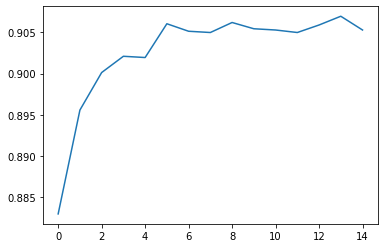

13


In [54]:
plt.plot(accuracy_list)
plt.show()
print(np.argmax(accuracy_list))

In [55]:
# Training the model with best estimators 
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(x_train, y_train)
knn.score(x_test,y_test)

0.9008013598834386

# Support Vector machines

In [56]:
# dealing with overfitting and underfitting also perform hyperparameter Tunning in one shot
accuracy_list = []
for i in [ 0.01, 0.1, 1, 10, 100, 1000, 10000]:
    svc = SVC(C=i)
    svc.fit(x_train, y_train)
    accuracy_list.append(svc.score(x_cv,y_cv))

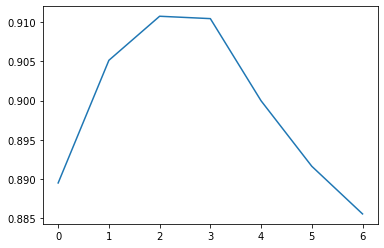

2


In [57]:
plt.plot(accuracy_list)
plt.show()
print(np.argmax(accuracy_list))

In [58]:
accuracy_list

[0.8894960534304797,
 0.905130540376442,
 0.9107468123861566,
 0.9104432301153612,
 0.8999696417729205,
 0.8916211293260473,
 0.8855494839101397]

In [59]:
# Training the model with best estimators 
svc = SVC(C=1)
svc.fit(x_train, y_train)
svc.score(x_test,y_test)

0.9050509956289461

# Evalution metrics

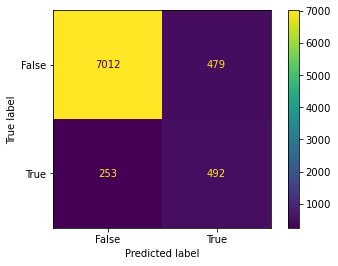

In [60]:
# Since the dataset is Imbalanced using the confusion matrix to test for effectiveness of model
confusion_matrix = metrics.confusion_matrix(y_pred, y_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7265
           1       0.66      0.51      0.57       971

    accuracy                           0.91      8236
   macro avg       0.80      0.74      0.76      8236
weighted avg       0.90      0.91      0.91      8236



#### Here since the presicion, recall and f1-score is all considerably high and we can conclude that model is not just a random or a dumb model

# Saving the model

In [62]:
joblib.dump(DT, 'model.pkl')

['model.pkl']

In [63]:
dt_model = joblib.load('model.pkl') 

In [64]:
dt_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

# converting the csv

In [65]:
prediction = pd.DataFrame(y_pred, columns=['predictions']).to_csv('prediction.csv')